안녕하세요! 데이크루로 활동 중인 sssssun 입니다!

이번 포스팅은 데이터 시각화의 기능으로써 seaborn을 사용하는  방법에 대한 마지막 포스팅입니다.

 
저도 배우는 사람의 입장에서 포스팅을 작성하기 때문에, seaborn의 시각화 기능을 처음 접하는 사람이라도 쉽게 따라오실 수 있으실거에요!


*   relation plots : 두 변수의 관계를 나타냄
##### 종류 : relplot, scatterplot, lineplot
*   categorical plots : 범주형 데이터를 대상으로 함
##### 종류 : catplot, stripplot, swarmplot, boxplot, violinplot, boxenplot, pointplot, barplot, countplot
*   distribution plots : 변수들의 분포를 나타냄
##### 종류 : hisplot, kdeplot, ecdfplot, rugplot, distplot	
*   regression plots : 회귀분석 결과를 나타내줌
##### 종류 : Implot, regplot, residplot
*   matrix plots : 변수 간의 관계 정도를 매트릭스로 만들고 색을 입혀 나타냄
##### 종류 : heatmap, clustermap
*   multi-plot grids : 여러 그래프를 한번에 나타냄
##### 종류 : FacetGrid, pairplot, PairGrid, jointplot, JointGrid

seaborn으로 구현 가능한 다양한 그래프 개형들을 소개하였고, 이번 포스팅에서는 남은 그래프들인 matrix plots과 multi-plot grid를 이용하는 방법을 설명하겠습니다.

라이브러리를 import해주고, 필요한 dataset을 불러왔습니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


먼저 matrix plots 부터 그려보겠습니다!


# 1. heatmap

heatmap은 데이터 간의 상관관계를 열화상 카메라로 촬영한 것과 같이 색의 차이를 이용하여 나타내줍니다.

heatmap을 그리기 위해서는 matrix 형태의 2차원 데이터가 필요합니다.

fights data set을 이용하여 그려보겠습니다.

pivot 함수를 이용하여 월별, 년별 승객수를 matrix로 만들어주었습니다.

In [6]:
flights_year = flights.pivot_table(index='year', columns='month', values='passengers')
flights_year

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


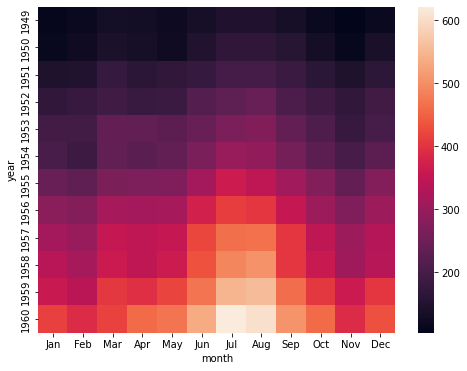

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(flights_year)
plt.show()

매개변수 annot를 True로 설정해주면, heatmap의 박스 안에 실제 데이터값을 표시해줍니다.

fmt는 셀 안에 들어갈 데이터의 형태를 설정해주는 매개변수로, 예시에서는 승객수로 정수 형태를 띄고 있기 때문에 'd'로 설정해주었습니다.

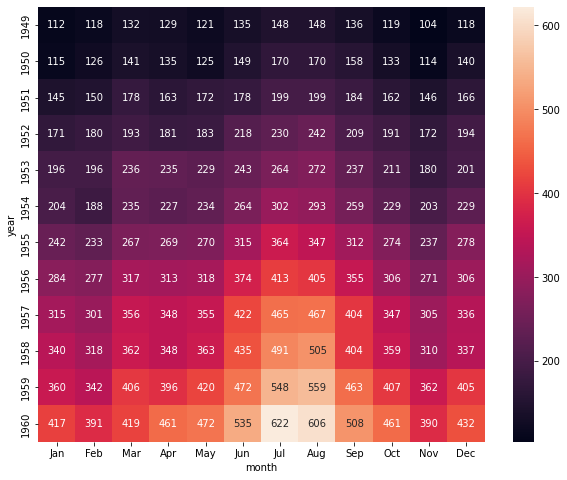

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(flights_year, annot=True, fmt='d')
plt.show()

cmap을 변경하면 다른 그래프의 palette 처럼 color map을 변경해줄 수 있습니다.

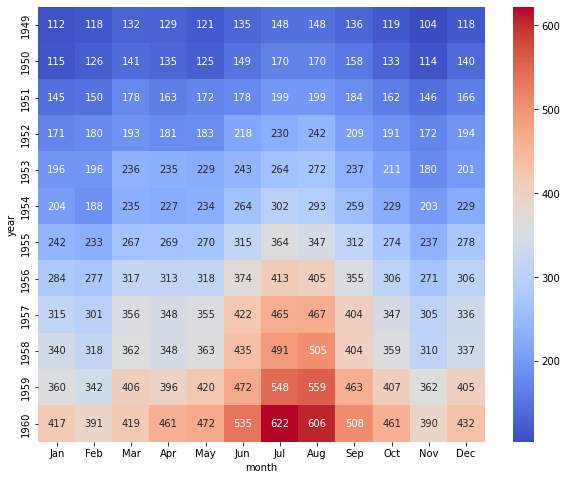

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(flights_year, annot=True, fmt='d', cmap='coolwarm')
plt.show()

여름에 승객수가 많은 편이고, 년도가 지날수록 승객수가 많아지네요!

# 2. clustermap

clustermap은 heaatmap과 비슷하지만, 상관도가 높은 변수들을 묶어서 나타내줍니다.

가지로 묶어서 나타내주고, 가장 아래의 가지가 상관도가 가장 높은 것입니다.

heatmap은 데이터 수치가 가장 높은 변수를 알 수 있는데 이에 더불어 변수 간의 상관성을 함께 볼 수 있다는 장점이 있습니다.

iris data set의 수치형변수들의 상관계수를 구해 clustermap으로 나타내보겠습니다.


In [20]:
iriscorr = iris.corr()
iriscorr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<Figure size 576x432 with 0 Axes>

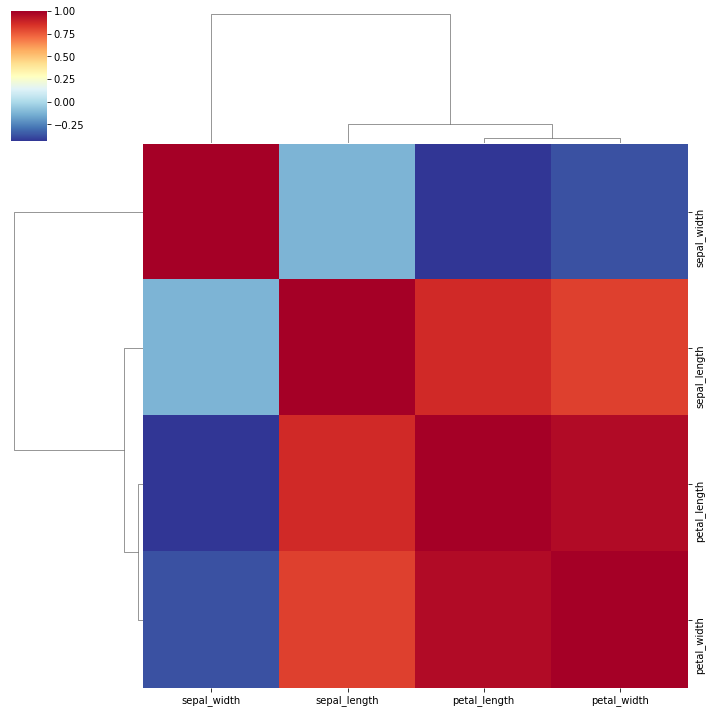

In [22]:
plt.figure(figsize=(8,6))
sns.clustermap(iriscorr, cmap='RdYlBu_r')
plt.show()

앞서 그렸던 flights dataset의 heatmap도 clustermap으로 나타내보았습니다.

<Figure size 576x432 with 0 Axes>

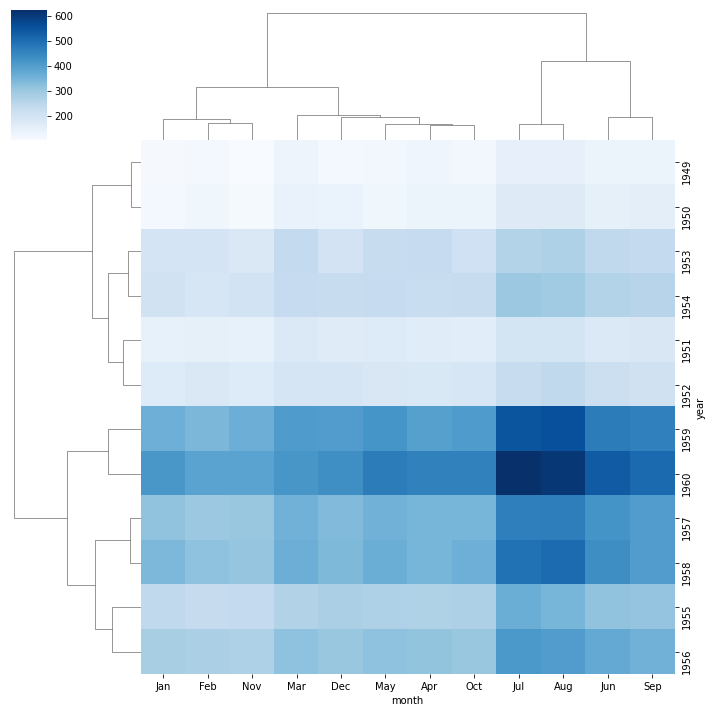

In [23]:
plt.figure(figsize=(8,6))
sns.clustermap(flights_year, cmap='Blues')
plt.show()

이번에는 여러 그래프를 한번에 그릴 수 있는 multi-plot grid를 이용해보겠습니다.

# 3. pairplot

pairplot은 대각선 줄에는 변수의 전체 분포를 히스토그램으로 나타내주고, 그 외의 셀에는 변수간의 관계를 나타내는 산점도를 나타내줍니다.

변수 별로 분포와 변수 간의 관계를 한번에 알 수 있다는 것이 장점이죠!

iris dataset으로 나타내보았습니다.

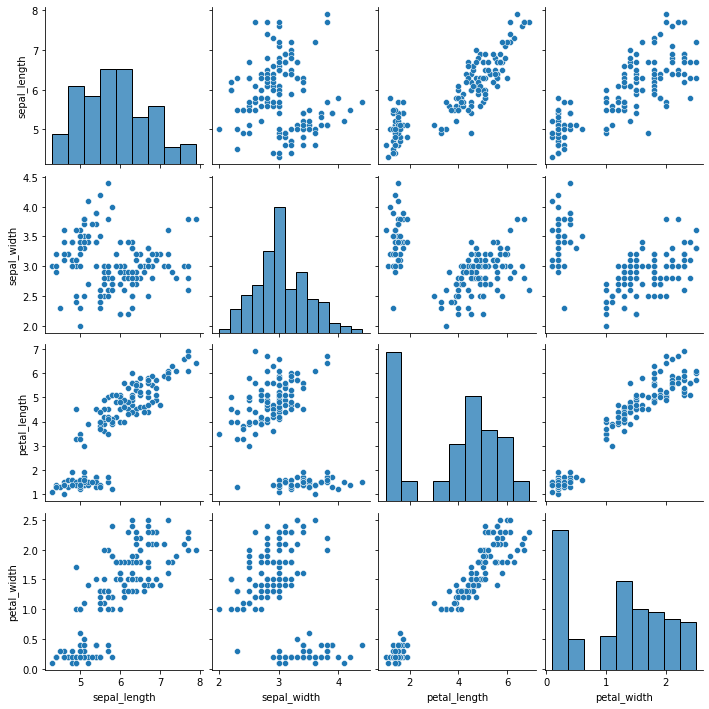

In [25]:
sns.pairplot(iris)
plt.show()

hue를 지정하여 범주별로 나타내줄 수 있습니다.

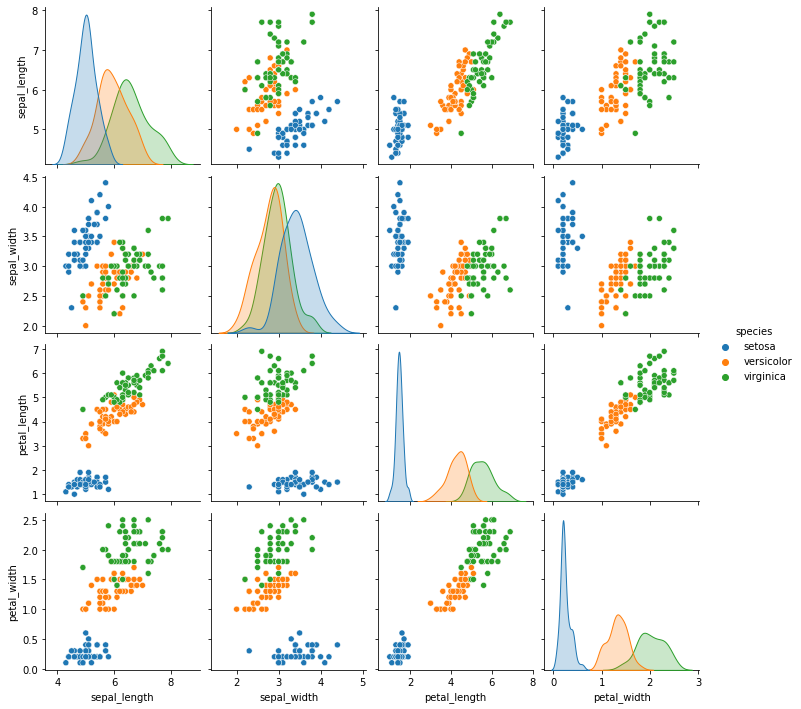

In [27]:
sns.pairplot(iris, hue='species')
plt.show()

# 4. jointplot

jointplot은 두 개의 수치형 변수에 대한 중앙 그래프, 그리고 변수 별로 축 그래프를 나타내줍니다.

중앙그래프는 kind 매개변수를 통해 지정해줄 수 있고, scatter, reg, kde 등 다양한 그래프로 나타낼 수 있습니다.



penguins data의 부리의 길이와 너비를 나타내봅시다.

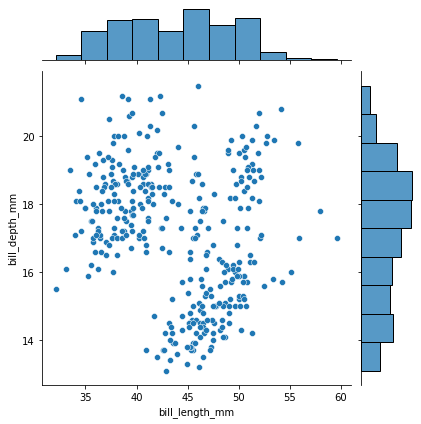

In [30]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm')
plt.show()

두 변수 사이의 연관성과 두 변수의 분포를 동시에 볼 수 있네요!

tips data의 총 금액과 tip 금액 사이의 연관성을 회귀선 그래프로 함께 나타내봅시다.

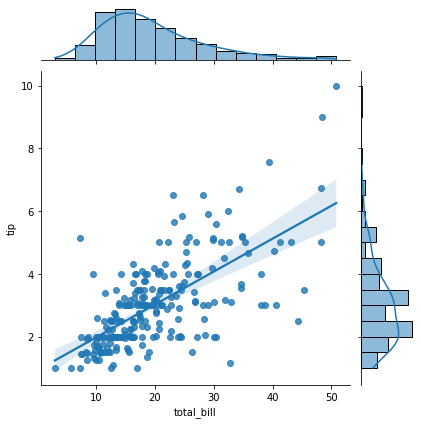

In [32]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='reg')
plt.show()

kind에 hex를 설정해주면, 육각 산점도를 그릴 수 있습니다.

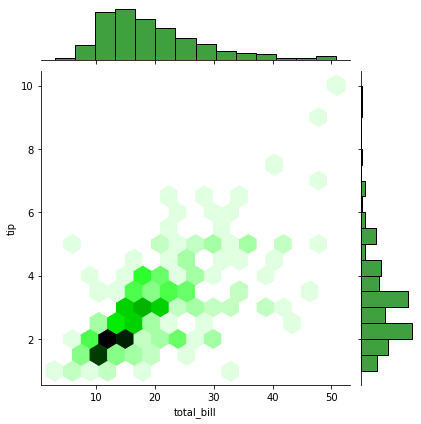

In [37]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='hex', color='g')
plt.show()

# 5. FacetGrid

facetgrid는 범주에 따라 col과 row를 활용하여 레이아웃을 설정해주고, map 함수를 활용하여 그래프를 추가해줄 수 있습니다.


세부적으로 요소를 조정할 수 있기 때문에, 세밀하고 다양한 그래프도 출력할 수 있습니다.

iris data set을 이용하겠습니다.

먼저, FactGrid 함수를 통해 가로축의 방향(col)으로 어느 범주를 지정해줄 지 선택합니다.

종별로 그래프를 그리기로 설정하니, 3개의 축이 나타났습니다.

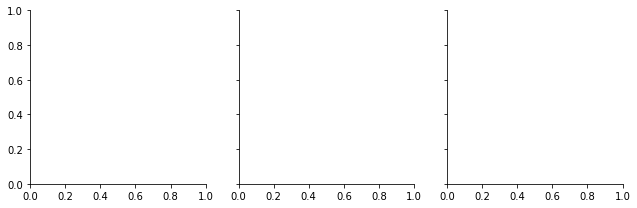

In [46]:
grid = sns.FacetGrid(data=iris, col="species")

전체 그래프 레이아웃을 grid로 지정해주고, map 함수를 통하여 그래프 개형을 선택해줍니다.

이때, plt를 활용하여 그래프 개형을 선택해주도록 합니다.

add_legend() 함수를 통해 범례를 추가할 수 있습니다.

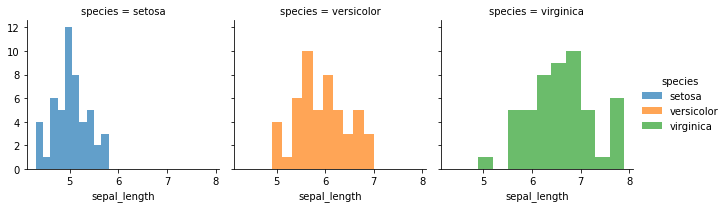

In [55]:
grid = sns.FacetGrid(data=iris, col="species", hue='species')
grid.map(plt.hist, "sepal_length")
grid.add_legend()
plt.show()

이렇게 변수 두가지를 지정해주고, 두 변수의 관계를 나타내는 산점도를 그릴 수도 있습니다.

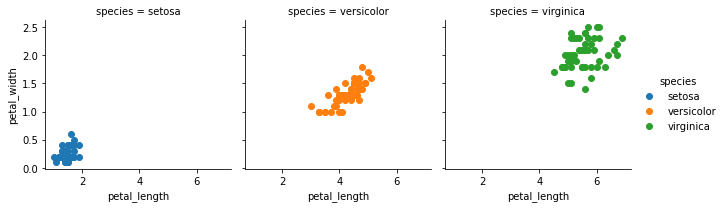

In [56]:
grid = sns.FacetGrid(data=iris, col="species", hue='species')
grid.map(plt.scatter, "petal_length", 'petal_width')
grid.add_legend()
plt.show()

아래와 같이 col과 row를 따로 설정해서 그래프를 나타낼 수도 있습니다.

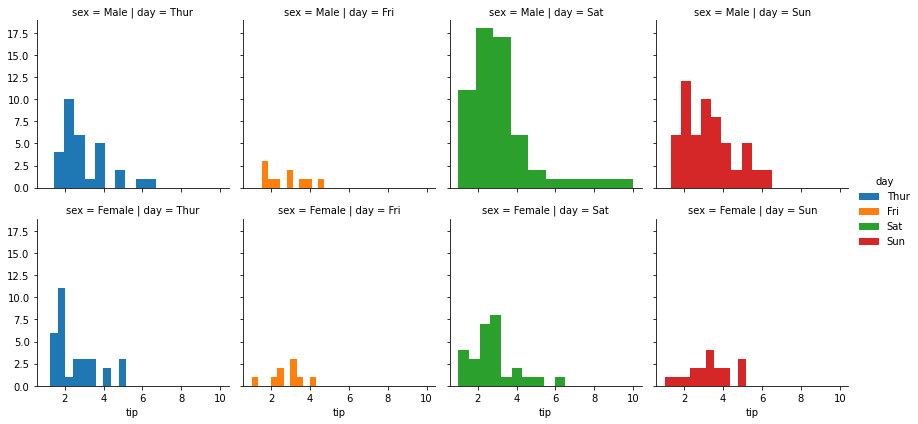

In [58]:
grid1 = sns.FacetGrid(data=tips, col="day", row="sex", hue="day")
grid1.map(plt.hist, "tip")
grid1.add_legend()
plt.show()

남성이 팁을 더 많이 내는 것 같고, 평일보다는 주말에 팀 금액이 더 높네요..

이번 포스팅에서는 2차원 형태의 데이터값을 나타내는 Matrix plots과 다양한 변수의 다양한 형태의 그래프를 한번에 나타낼 수 있는 multi-grid plot 를 나타내보았습니다!

이렇게 seaborn으로 할 수 있는 모든 플로팅을 해보았는데요!

혹시 seaborn의 시각화를 처음 접하시는 분이라면 도움이 되었으면 좋겠네요!

읽어주셔서 감사합니다^^